#Project_ML

# MLP Model – Variables, Parameters & Hyperparameters

| Model | Variables involved | Parameters and Hyperparameters |
|-------|---------------------|-------------------------------|
| **MLP** | **Input features (30 variables) from the WDBC dataset:**<br>- radius (mean, se, worst)<br>- texture (mean, se, worst)<br>- perimeter (mean, se, worst)<br>- area (mean, se, worst)<br>- smoothness (mean, se, worst)<br>- compactness (mean, se, worst)<br>- concavity (mean, se, worst)<br>- concave points (mean, se, worst)<br>- symmetry (mean, se, worst)<br>- fractal dimension (mean, se, worst)<br><br>**Target variable:**<br>- Diagnosis (Benign = 0, Malignant = 1) | **MLP Architecture:**<br>- Hidden layers: 3<br>- Units per layer: 500 – 500 – 500<br>- Activation: ReLU<br><br>**Training Setup:**<br>- Loss: cross-entropy<br>- Optimizer: SGD<br><br>**Performance:**<br>- Accuracy: 99.04%<br>- FPR: 1.27%<br>- FNR: 0.79%<br>- TPR: 99.21%<br>- TNR: 98.73%<br><br>**Additional Hyperparameters:**<br>- Batch Size: 128<br>- Architecture: [500, 500, 500] (3 hidden layers)<br>- Dropout Rate: None<br>- Epochs: 3000<br>- Learning Rate: 1e-2 |


In [52]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,BatchNormalization,GRU  
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [53]:
#data loading 
df=pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [19]:
#data understanding 
df.describe()
df.info()
df.isnull().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [31]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [54]:
# convert the column diagnosis from being categorical to binary : (Malignant), B=0 (Benign)
df['diagnosis'] = df['diagnosis'].apply(lambda v: 1 if v == 'M' else 0)
df['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

In [45]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

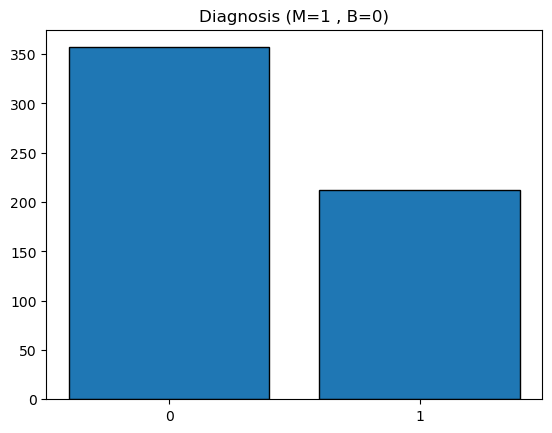

In [55]:

plt.hist(df['diagnosis'], 
         bins=[-0.5, 0.5, 1.5], 
         edgecolor='black',
         rwidth=0.8)   

plt.title('Diagnosis (M=1 , B=0)')
plt.xticks([0, 1])
plt.show()


In [56]:
#remove empty column 
df.drop( 'Unnamed: 32', axis=1 , inplace=True)
#remove the id because it doesnt infuluence the target
df.drop('id' , axis=1 , inplace=True)

In [48]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
#separate the features and the target 
X=df.drop('diagnosis' , axis=1)
y=df['diagnosis']

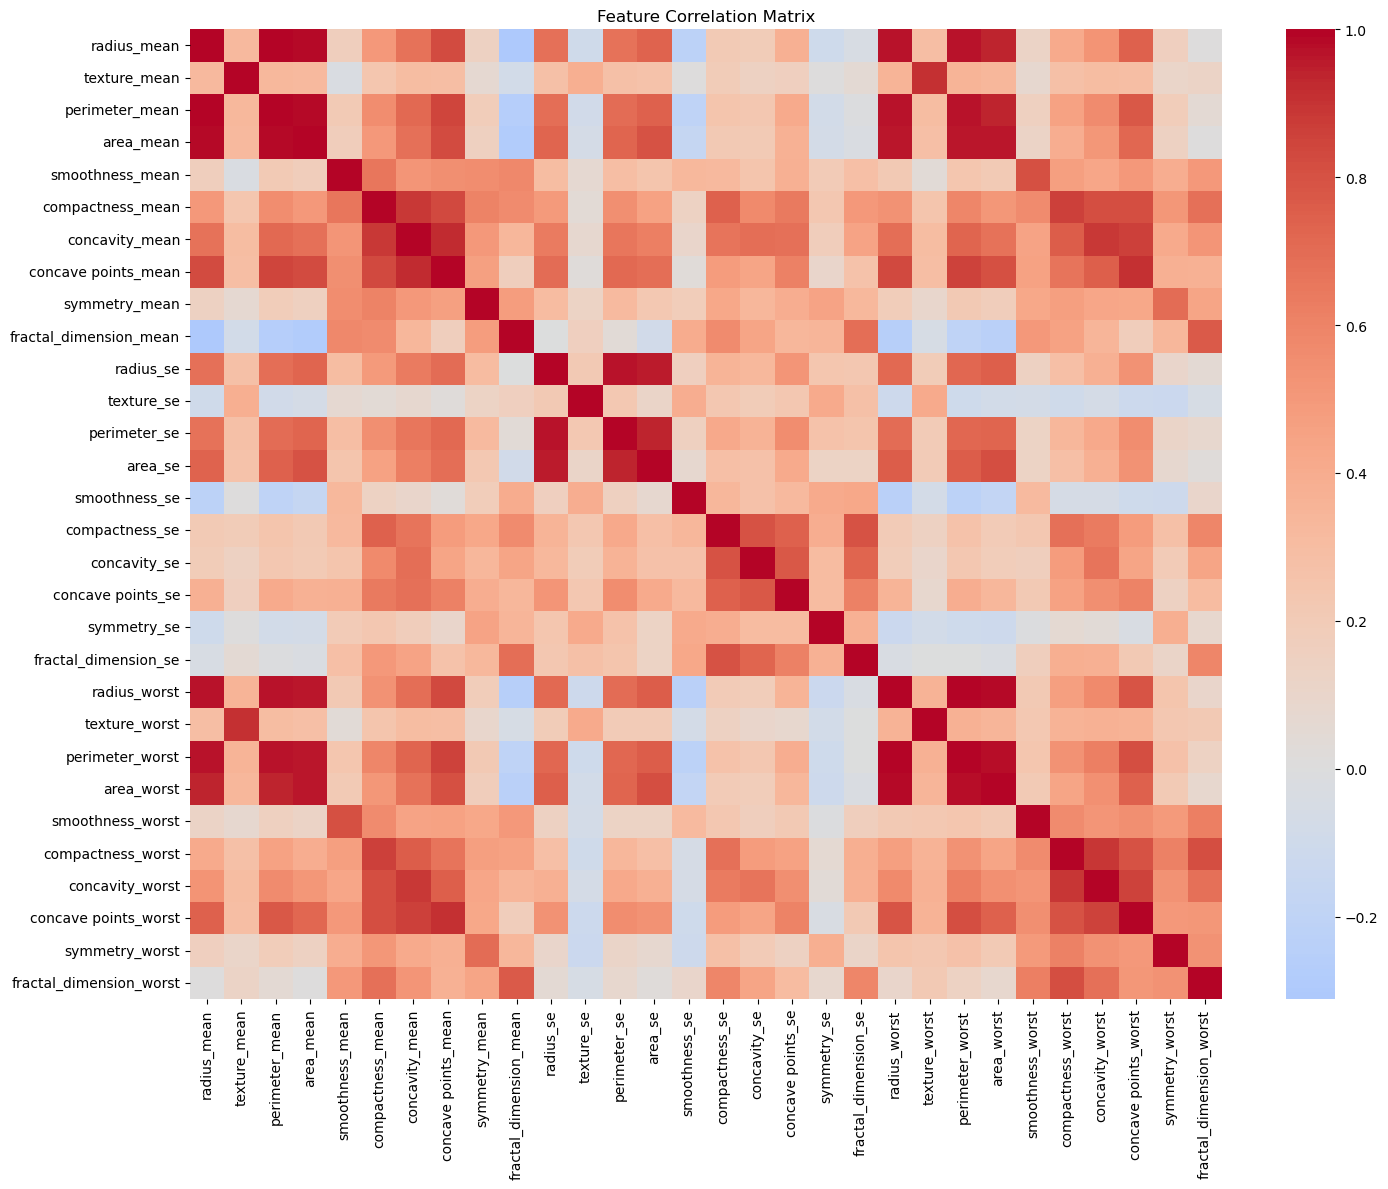

In [53]:
# look at how features are correlated 
correlation_matrix=X.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix , annot=False , cmap='coolwarm' , center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [57]:
df_staged= df.copy()

aggressive_features= ['radius_worst', 'concavity_worst','concave points_worst', 'area_worst', 'compactness_worst', 'perimeter_worst']

for feature in aggressive_features:
    min_val=df_staged[feature].min()
    max_val = df_staged[feature].max()
    df_staged[feature]=(df_staged[feature]-min_val)/(max_val-min_val)

cols=[feature for feature in aggressive_features]
df_staged['aggressiveness_score']=df_staged[cols].mean(axis=1)*100


def assign_morphology_stage(row):

    score = row['aggressiveness_score']
    radius = row['radius_worst']
    concavity = row['concavity_worst']
    diagnosis = row['diagnosis']
    
    if (score < 30) and (radius < 15) and (concavity < 0.1):
        return '1'
    
    elif (score > 80) or (diagnosis == 1 and (radius > 20 or concavity > 0.3)):
        return '4'
    
    elif (score > 60) and (diagnosis == 1):
        return '3'
    
    else:
        return '2'
    # Apply stage assignment
df_staged['morphology_stage'] = df_staged.apply(assign_morphology_stage, axis=1)

print("Morphological stages created successfully!")
print(f"\nStage Distribution:")
stage_counts = df_staged['morphology_stage'].value_counts().sort_index()
for stage, count in stage_counts.items():
    percentage = (count / len(df_staged)) * 100
    print(f"  Stage {stage}: {count} samples ({percentage:.1f}%)")


# Remove temporary normalized columns
# df_staged = df_staged.drop(norm_cols, axis=1)

Morphological stages created successfully!

Stage Distribution:
  Stage 1: 157 samples (27.6%)
  Stage 2: 278 samples (48.9%)
  Stage 4: 134 samples (23.6%)


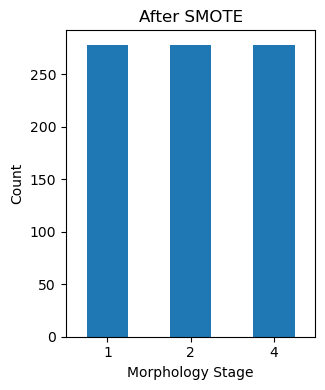

In [62]:
# Select features for the model 
from sklearn.calibration import LabelEncoder


X2 = df_staged.drop([ 'diagnosis', 'morphology_stage', 'aggressiveness_score'], 
                   axis=1, errors='ignore')
y2 = df_staged['morphology_stage']


# Convert stages to numbers 
le = LabelEncoder()
y_encoded = le.fit_transform(y2)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X2, y_encoded)

# Convert encoded classes back to original stage labels
after_labels = pd.Series(le.inverse_transform(y_sm))

# Plot AFTER SMOTE
plt.figure(figsize=(6,4))
plt.subplot(1, 2, 2)
after_labels.value_counts().sort_index().plot(kind='bar')
plt.title("After SMOTE")
plt.xlabel("Morphology Stage")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [45]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Standardize the features so all features will be on the same scale 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

Training set: (455, 30)
Testing set: (114, 30)


In [64]:



# Split data into training (80%) and testing (20%)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm
)


# Scale features (important for most ML algorithms)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2= scaler.transform(X_test2)

print("\nFeatures scaled (mean=0, variance=1)")


Features scaled (mean=0, variance=1)


In [46]:

learning_rate = 0.001  #  how big each step when the model updates its weights
training_epochs = 100  # the maximum number of times the model will see the entire data 
batch_size = 32        #the number of the sample processed before the model updates the weights 
display_step = 10

# Network Parameters (optimized for 30 features)
n_hidden_1 = 128  # 1st layer neurons
n_hidden_2 = 64   # 2nd layer neurons  
n_input = X_train_scaled.shape[1]  # Number of features
n_classes = 1     # the single output neuron which predicts the probability of the positive class (Malignant = 1)

# Build the model using Keras Sequential API
def create_mlp_model():
    model = tf.keras.Sequential([
        # Hidden fully connected layer with 128 neurons
        tf.keras.layers.Dense(n_hidden_1, activation='relu', input_shape=(n_input,)),
        tf.keras.layers.Dropout(0.3),  # ignores randomly 30% of the neurons to prevent overfitting 
        
        # Hidden fully connected layer with 64 neurons
        tf.keras.layers.Dense(n_hidden_2, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        
        # Output layer (sigmoid for binary classification)
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create model
model = create_mlp_model()

# Define loss and optimizer (modern equivalent)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), # Adam optimizer :smart way to update weights.It remembers past gradients + adjusts step size per weight 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("=== MODEL ARCHITECTURE ===")
model.summary()

# Enhanced training with callbacks
#stops training if validation accuracy stops improving for 20 epochs. Avoids overfitting.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True,
    mode='max'
)

# if the loss plateaus for 10 epochs , we reduce the learning rate by 0.5
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.0001
)

print("=== STARTING TRAINING ===")

# Training loop 
#Feeds training data into the model.Validates on test data after each epoch
history = model.fit(
    X_train_scaled, y_train,
    batch_size=batch_size,
    epochs=training_epochs,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
    shuffle=True
)

# Evaluate the model
print("=== FINAL EVALUATION ===")

#Predict probabilities of Malignant.Threshold 0.5 → anything above = 1 (Malignant), below = 0 (Benign).
y_pred_proba = model.predict(X_test_scaled) 
y_pred = (y_pred_proba > 0.5).astype("int32").flatten()

# Calculate accuracy
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Target Accuracy: 0.9904")
print(f"Difference: {final_accuracy - 0.9904:.4f}")

if final_accuracy >= 0.9904:
    print(" TARGET ACHIEVED! 99.04%+ Accuracy Reached!")
else:
    print(f"Need improvement: {(0.9904 - final_accuracy)*100:.2f}% to reach target")

# Detailed metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\n=== DETAILED METRICS ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, y_pred))

=== MODEL ARCHITECTURE ===


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

=== STARTING TRAINING ===
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8308 - loss: 0.4636 - val_accuracy: 0.9737 - val_loss: 0.2387 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9604 - loss: 0.1950 - val_accuracy: 0.9737 - val_loss: 0.1232 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9516 - loss: 0.1401 - val_accuracy: 0.9825 - val_loss: 0.0902 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9626 - loss: 0.1034 - val_accuracy: 0.9912 - val_loss: 0.0746 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9758 - loss: 0.0935 - val_accuracy: 0.9912 - val_loss: 0.0673 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9692 - loss: 0.0840 - val_accuracy: 0.9912 - val_loss: 0.0646 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.

In [49]:
from tensorflow.keras import regularizers

def create_l1_model(n_input, l1_strength=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            128, activation='relu',
            input_shape=(n_input,),
            kernel_regularizer=regularizers.l1(l1_strength)
        ),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model
    
model_l1 = create_l1_model(n_input=X_train_scaled.shape[1])

history = model_l1.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

def get_l1_importance(model, feature_names):
    w = model.layers[0].get_weights()[0]  # weights of input layer
    importance = np.sum(np.abs(w), axis=1)
    importance /= importance.max()         # normalize 0–1
    return dict(zip(feature_names, importance))



def permutation_importance(model, X_test, y_test):
    baseline = accuracy_score(
        y_test, (model.predict(X_test) > 0.5).astype("int32")
    )

    importances = []
    X_temp = X_test.copy()

    for i in range(X_test.shape[1]):
        saved = X_temp[:, i].copy()
        np.random.shuffle(X_temp[:, i])

        preds = (model.predict(X_temp) > 0.5).astype("int32")
        acc = accuracy_score(y_test, preds)

        importances.append(baseline - acc)
        X_temp[:, i] = saved  # restore feature

    return np.array(importances)



def select_features(l1_scores, perm_scores, feature_names):
    l1_norm = l1_scores / np.max(l1_scores)
    perm_norm = (perm_scores - np.min(perm_scores)) / (np.max(perm_scores) - np.min(perm_scores))

    combined = (l1_norm + perm_norm) / 2

    threshold = np.percentile(combined, 30)  # keep top 70%
    selected = [feature_names[i] for i in range(len(combined)) if combined[i] > threshold]

    return selected


def retrain_selected_features(selected_features, feature_names, X_train, X_test):
    indices = [feature_names.index(f) for f in selected_features]

    X_train_sel = X_train[:, indices]
    X_test_sel = X_test[:, indices]

    model = create_l1_model(len(indices), l1_strength=0.0)
 

    model.fit(
        X_train_sel, y_train,
        validation_data=(X_test_sel, y_test),
        epochs=50,
        batch_size=32,
        verbose=1
    )

    preds = (model.predict(X_test_sel) > 0.5).astype("int32")
    acc = accuracy_score(y_test, preds)

    return model, acc

feature_names = X.columns.tolist()

# Step 1: Train L1 model
model_l1 = create_l1_model(X_train_scaled.shape[1])
model_l1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Step 2: L1 importance
l1_importance = get_l1_importance(model_l1, feature_names)
l1_scores = np.array(list(l1_importance.values()))

# Step 3: Permutation importance
perm_scores = permutation_importance(model_l1, X_test_scaled, y_test)

# Step 4: Select features
selected = select_features(l1_scores, perm_scores, feature_names)
print("Selected features:", selected)

# Step 5: Retrain using selected features
final_model, final_accuracy = retrain_selected_features(
    selected, feature_names, X_train_scaled, X_test_scaled
)

print("\nAccuracy with selected features:", final_accuracy)

# -------------------------------
# Step 6: Add Evaluation Metrics
# -------------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Extract selected feature indices
selected_indices = [feature_names.index(f) for f in selected]

# Apply selection to test data
X_test_sel = X_test_scaled[:, selected_indices]

# Predict on selected features
y_pred_prob = final_model.predict(X_test_sel)
y_pred = (y_pred_prob > 0.5).astype("float32")


# Compute metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n=== EVALUATION METRICS (Selected Features) ===")
print(f"Accuracy:   {acc:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"F1-score:   {f1:.4f}")

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

print("\n=== CONFUSION MATRIX ===")
print(cm)



Epoch 1/50


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8989 - loss: 0.7415 - val_accuracy: 0.9649 - val_loss: 0.5453
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9714 - loss: 0.4998 - val_accuracy: 0.9737 - val_loss: 0.4545
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9780 - loss: 0.4413 - val_accuracy: 0.9825 - val_loss: 0.4185
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9824 - loss: 0.4081 - val_accuracy: 0.9825 - val_loss: 0.3966
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9868 - loss: 0.3830 - val_accuracy: 0.9825 - val_loss: 0.3798
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9846 - loss: 0.3604 - val_accuracy: 0.9825 - val_loss: 0.3601
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9890 - loss: 0.3407 - val_accuracy: 0.9825 - val_loss: 0.3416
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9912 - loss: 0.3214 - val_accuracy: 0.9825 - val_loss: 0.3

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9011 - loss: 0.4000 - val_accuracy: 0.9474 - val_loss: 0.2439
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9363 - loss: 0.1959 - val_accuracy: 0.9474 - val_loss: 0.1443
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9538 - loss: 0.1282 - val_accuracy: 0.9561 - val_loss: 0.1098
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9736 - loss: 0.0929 - val_accuracy: 0.9649 - val_loss: 0.0994
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9824 - loss: 0.0739 - val_accuracy: 0.9649 - val_loss: 0.0901
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9824 - loss: 0.0622 - val_accuracy: 0.9649 - val_loss: 0.0803
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9846 - loss: 0.0546 - val_accuracy: 0.9561 - val_loss: 0.0865
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9890 - loss: 0.0479 - val_accuracy: 0.9649 - val_loss: 0.

1. MLP Model (Tumor Diagnosis)

The MLP is a neural network that takes 30 features from FNA tests as input.

It has two hidden layers (128 and 64 neurons) with ReLU activation, which allows it to learn complex patterns in the data.

Dropout layers randomly ignore 30% of neurons during training, which helps prevent overfitting and makes the model generalize well.

The output layer uses a sigmoid activation, predicting the probability of a tumor being malignant.

The model achieved 99.12% accuracy because:

The dataset is well-structured with clear differences between benign and malignant tumors.

Neural networks can capture non-linear relationships between features that simple models might miss.

Proper scaling, SMOTE balancing, and early stopping helped the model train effectively without overfitting.

Essentially, the model learned the patterns of tumor cell features, and can almost always tell if a tumor is benign or malignant.



2. L1-Regularized Feature Selection Model (Explainable AI)

This model uses L1 regularization, which forces less important feature weights toward zero, helping identify the most influential features.

Permutation importance checks how much the model’s accuracy drops if each feature is shuffled, confirming which features matter most.

Retraining the model using only the selected features achieved 96.5% accuracy.

High accuracy is maintained because:

The most relevant features capture the key differences between benign and malignant tumors.

L1 regularization reduces noise from irrelevant features, making the model simpler and easier to interpret.

This model provides explainability, showing doctors which features influenced the decision, which is crucial in medical AI.


=======>The MLP model works as a fast, highly accurate tumor classifier, capturing complex patterns in the FNA features.

The L1 model works as an explainable AI assistant, highlighting important features while keeping high accuracy.

Both models complement each other: one ensures reliable predictions, the other provides transparency and trust for medical professionals.

In [65]:

# Create and train the model
model = RandomForestClassifier(
    n_estimators=100,     # Number of trees in the forest
    max_depth=10,         # Maximum depth of each tree
    min_samples_split=5,  # Minimum samples to split a node
    min_samples_leaf=2,   # Minimum samples in a leaf
    random_state=42       # For reproducibility
)

print("Training Random Forest model...")
model.fit(X_train_scaled2, y_train2)
print("Model training completed!")

# Make predictions on test data
y_pred = model.predict(X_test_scaled2)
y_pred_proba = model.predict_proba(X_test_scaled2)

print(f"\nPredictions made for {len(y_pred)} test samples")
print(f"First 5 predictions: {le.inverse_transform(y_pred[:5])}")
print(f"First 5 actual: {le.inverse_transform(y_test2[:5])}")

Training Random Forest model...
Model training completed!

Predictions made for 167 test samples
First 5 predictions: ['2' '1' '4' '4' '4']
First 5 actual: ['2' '1' '4' '4' '4']


Overall Accuracy: 97.01%

Detailed Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        55
           2       0.95      0.96      0.96        56
           4       0.98      0.95      0.96        56

    accuracy                           0.97       167
   macro avg       0.97      0.97      0.97       167
weighted avg       0.97      0.97      0.97       167



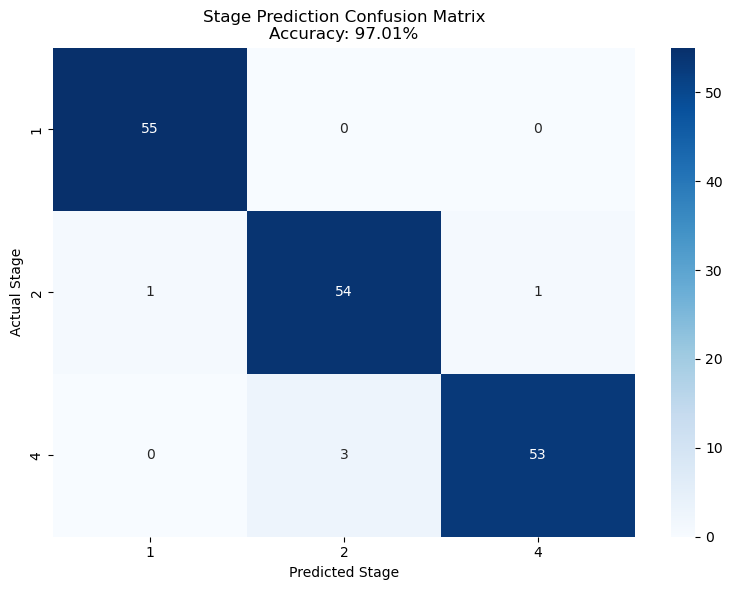


Confusion Matrix Interpretation:
Rows = Actual stages, Columns = Predicted stages
Diagonal (top-left to bottom-right) = Correct predictions
Off-diagonal = Misclassifications


In [66]:


# Calculate overall accuracy
accuracy = accuracy_score(y_test2, y_pred)
print(f"Overall Accuracy: {accuracy:.2%}")

print("\nDetailed Classification Report:")
print(classification_report(y_test2, y_pred, target_names=le.classes_))

# Confusion Matrix (shows correct vs incorrect predictions)
cm = confusion_matrix(y_test2, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Stage Prediction Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.ylabel('Actual Stage')
plt.xlabel('Predicted Stage')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print("Rows = Actual stages, Columns = Predicted stages")
print("Diagonal (top-left to bottom-right) = Correct predictions")
print("Off-diagonal = Misclassifications")

====>The Random Forest model is better than Logistic Regression for predicting breast cancer recurrence. It correctly identifies most patients who will experience recurrence (83% recall), which is very important for early intervention. Logistic Regression is decent overall (74% accuracy) but misses more recurrence cases, which could be risky. Random Forest strikes a better balance between catching recurrence and avoiding false alarms, making it more reliable as a decision-support tool for doctors.

In [67]:

# 1. Load data
df = pd.read_excel("recurrent_breastcancer.xlsx")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# 2. Data exploration
print("\n=== DATASET INFO ===")
print(df.info())

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== STATISTICAL SUMMARY ===")
print(df.describe())

# 3. Handle missing values
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

print("\n=== AFTER HANDLING MISSING VALUES ===")
print("Missing values remaining:", df.isnull().sum().sum())


Dataset shape: (286, 10)

First 5 rows:
     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  right   
4  40-49   premeno        0-4       0-2        no          2  right   

  breast-quad irradiat                target  
0    left_low       no  no-recurrence-events  
1    right_up       no  no-recurrence-events  
2    left_low       no  no-recurrence-events  
3     left_up       no  no-recurrence-events  
4   right_low       no  no-recurrence-events  

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 

Text(0, 0.5, 'Count')

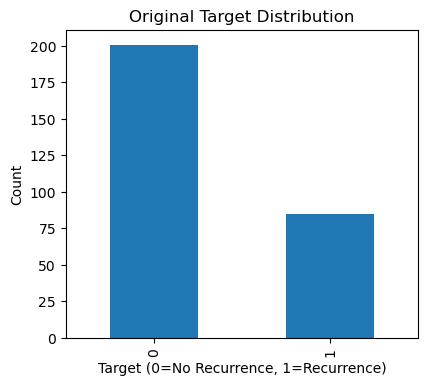

In [68]:

# 4. Encode target variable
df["target"] = df["target"].map({
    "recurrence-events": 1,
    "no-recurrence-events": 0
})

# 5. Target distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df["target"].value_counts().plot(kind="bar")
plt.title("Original Target Distribution")
plt.xlabel("Target (0=No Recurrence, 1=Recurrence)")
plt.ylabel("Count")


In [69]:

# 6. Prepare features and target
X = df.drop("target", axis=1)
y = df["target"]

# 7. One-hot encoding for categorical variables
print("\n=== BEFORE ONE-HOT ENCODING ===")
print(f"Original features: {X.shape[1]}")
X = pd.get_dummies(X)
print(f"After one-hot encoding: {X.shape[1]} features")


=== BEFORE ONE-HOT ENCODING ===
Original features: 9
After one-hot encoding: 39 features



=== APPLYING SMOTE ===
Before SMOTE - Class distribution: {0: 201, 1: 85}
After SMOTE - Class distribution: {0: 201, 1: 201}


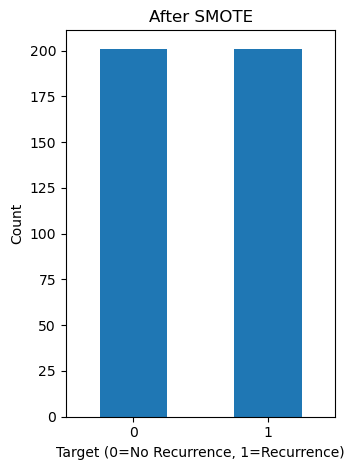

In [70]:
# 8. Handle class imbalance with SMOTE
print("\n=== APPLYING SMOTE ===")
print(f"Before SMOTE - Class distribution: {pd.Series(y).value_counts().to_dict()}")
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)
print(f"After SMOTE - Class distribution: {pd.Series(y_smote).value_counts().to_dict()}")

# Plot after SMOTE
plt.subplot(1, 2, 2)
pd.Series(y_smote).value_counts().plot(kind='bar')
plt.title('After SMOTE')
plt.xlabel("Target (0=No Recurrence, 1=Recurrence)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [71]:

# 9. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)
print(f"\n=== DATA SPLIT ===")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# 10. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


=== DATA SPLIT ===
Training set: (321, 39)
Testing set: (81, 39)


In [74]:
# 11. Baseline model - Logistic Regression
print("\n" + "="*50)
print("BASELINE MODEL: LOGISTIC REGRESSION")
print("="*50)
baseline = LogisticRegression(max_iter=200, random_state=42)
baseline.fit(X_train_scaled, y_train)
baseline_pred = baseline.predict(X_test_scaled)





BASELINE MODEL: LOGISTIC REGRESSION


In [73]:
print("\n=== BASELINE LOGISTIC REGRESSION ===")
print(classification_report(y_test, baseline_pred))
# Calculate individual metrics for baseline
baseline_accuracy = accuracy_score(y_test, baseline_pred)
baseline_precision = precision_score(y_test, baseline_pred)
baseline_recall = recall_score(y_test, baseline_pred)
baseline_f1 = f1_score(y_test, baseline_pred)

print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"Precision: {baseline_precision:.4f}")
print(f"Recall: {baseline_recall:.4f}")
print(f"F1-Score: {baseline_f1:.4f}")



=== BASELINE LOGISTIC REGRESSION ===
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        45
           1       0.73      0.61      0.67        36

    accuracy                           0.73        81
   macro avg       0.73      0.72      0.72        81
weighted avg       0.73      0.73      0.72        81

Accuracy: 0.7284
Precision: 0.7333
Recall: 0.6111
F1-Score: 0.6667


Accuracy 73% → Overall, the model correctly predicts whether cancer will recur or not 73% of the time.

Precision 0.73 for recurrence-events → When the model predicts a recurrence, it is correct 73% of the time.

Recall 0.61 for recurrence-events → The model only identifies 61% of actual recurrences, meaning it misses 39% of patients who actually experience recurrence.

F1-score 0.67 → This is a balance between precision and recall, showing moderate performance.

Conclusion: The logistic regression baseline model performs decently, but it fails to catch a significant number of actual recurrence cases, which is critical in a medical context. While it can provide some guidance, improvements or more complex models are needed for reliable clinical decision-making.

In [75]:
# 12. Random Forest Model
print("\n" + "="*50)
print("RANDOM FOREST MODEL")
print("="*50)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)


RANDOM FOREST MODEL


In [76]:

print("\n=== RANDOM FOREST RESULTS ===")
print(classification_report(y_test, y_pred))

# Calculate individual metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")


=== RANDOM FOREST RESULTS ===
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.77      0.83      0.80        36

    accuracy                           0.81        81
   macro avg       0.81      0.82      0.81        81
weighted avg       0.82      0.81      0.82        81

Accuracy: 0.8148
Precision: 0.7692
Recall: 0.8333
F1-Score: 0.8000


Text(568.5163398692812, 0.5, 'Actual')

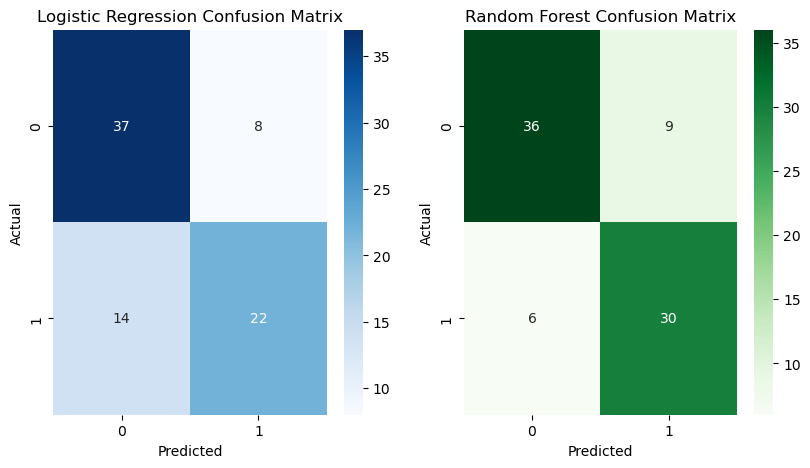

In [ ]:
Accuracy 81% → The model correctly predicts recurrence or no recurrence 81% of the time, slightly better than Logistic Regression.

Precision 0.77 for recurrence-events → When the model predicts recurrence, it is correct 77% of the time.

Recall 0.83 for recurrence-events → The model identifies 83% of actual recurrence cases, meaning it misses only 17%, which is much better than Logistic Regression.

F1-score 0.80 → Shows a good balance between precision and recall, better than Logistic Regression.

====>
The Random Forest model outperforms Logistic Regression, especially in detecting actual recurrence cases (higher recall), which is crucial in
a medical setting. While precision is slightly lower (more false positives), this is acceptable because missing a recurrence (false negative) is
far riskier than a false alarm. Overall, Random Forest provides a more reliable decision-support tool for doctors, correctly identifying most patients 
at risk of recurrence while maintaining strong overall accuracy.